## 4.3 Ensemble

### 1. 앙상블학습이란?

1) `아이디어` : **협동**

"어떤 일을 혼자 다 하는 것보다 `서로 다른 여럿이` 함께 하면 더 잘 된다."

이유는?

각자 부족한 점을 서로 메워줄 수 있기 때문에.

머신러닝 알고리즘이 하는 일도 마찬가지 아닐까? 알고리즘마다 각각 장점, 단점을 갖고 있으니 한 가지만으로 분석하는 것보다는 여러 알고리즘을 함께 이용하면 더 성능좋은 방법이 생기지 않을까?



* Ensemble : 어려운 문제의 답을 한 사람에게 물어보기보다는 많은 사람들에게 물어보면(집단 지성을 동원해서) 더 좋은 결과가 나올 것이다. 앙상블을 이용한 분류 학습은 여러 개의 분류기를 만들어 예측한 다음 그 결과를 결합하여 개별 분류기의 예측보다 성능 좋은 결과를 얻으려고 한다.

2) `앙상블 학습의 유형`
 + voting
 + bagging
 + boosting 
 + stacking
 + ...




3) `앙상블 분류 학습` : 여러 개의 분류기를 만들어서 예측결과들을 결합함으로써 단일 분류방법보다 나은 예측을 하는 기법

* 앙상블 분류의 종류
 + **Random Forest** : 의사결정트리 알고리즘을 이용한 배깅
 + Gradient Boosting
 + XGBoost (eXtra Gradient Boost)
 + LightGBM (Light Gradient Boost)
 + Stacking

### 2. 보팅과 배깅
 
1) `보팅과 배깅의 차이`
 + **voting** : `서로 다른 알고리즘`을 하나의 데이터세트에 적용하고 그 결과를 투표를 통해 결합.
 + **bagging** (bootstrap + aggregating): `붓스트래핑 방법`(복원 추출)으로 데이터를 샘플링한 다음 같은 종류의 알고리즘을 데이터마다 적용하고 그 결과를 투표를 통해 결합. 

보팅과 배깅의 다른 점을 [그림](https://velog.io/@jiselectric/Ensemble-Learning-Voting-and-Bagging-at6219ae)을 참조해서 이해하자.


 2) `하드보팅과 소프트보팅`
(분류의 경우를 예로 들어 설명)

 + **hard voting** : 다수결 방식 투표, 여러 분류기들이 예측한 결과 가운데 가장 많은 분류기가 예측한 결과로 최종 예측값을 결정.
 + **soft voting** : target 변수의 범주별로 각 분류기들이 계산한 예측 확률을 모두 더해서 그 값이 가장 높은 결과를 최종 예측값으로 결정.

 [그림](https://velog.io/@jiselectric/Ensemble-Learning-Voting-and-Bagging-at6219ae) 참조. (교재 214쪽 그림)



### 3. voting ensemble 방법을 이용한 손글씨 데이터 분석 실습 

knn(최근접 이웃), logistic regression(목표변수가 범주형)은 의사결정트리와 더불어 널리 이용되는 분류 알고리즘이다.

의사결정트리, knn, logistic regression 모델의 앙상블로 손글씨 숫자를 분류할 때와 개별 분류방법 단독으로 숫자를 분류할 때 결과를 비교해보자.

* 라이브러리 불러오기 

사이킷런의 `tree, neighbors, linear_model` 모듈에서 필요한 클래스를 불러온다. 또한 사이킷런 `ensemble` 모듈에서 보팅 분류를 위한 클래스 `VotingClassifier`를 불러온다. `model_selection` 안에 있는 `train_test_split`, `metrics` 모듈 안에 있는 `accuracy_score` 역시 데이터 분할과 모델 성능 평가를 위해 필요하다.

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
np.random.seed(5)

* MNIST 손글씨 데이터 불러오기

예제로 이용할 유명한 [**MNIST 데이터베이스**](https://en.wikipedia.org/wiki/MNIST_database) (Modified National Institute of Standards and Technology database)는 사람들이 손으로 쓴 0부터 9까지 열 개 숫자 글씨를 이미지 파일로 만든 것이다. 이 데이터는 이미지를 판독하는 머신러닝의 성능을 알아볼 때 널리 쓰인다. [사이킷런의 설명](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)을 잠시 보자. 

교재에서 이용할 데이터는 `from sklearn.datasets import load_digits`와 같이 불러올 수 있다.

In [2]:
from sklearn.datasets import load_digits
mnist = load_digits()
type(mnist)

sklearn.utils.Bunch

Bunch type 데이터 `mnist`에 어떤 키들이 있는지 확인해보자.


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
mnist.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
mnist.target[:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
mnist.target[[0, -1]] 

array([0, 8])

In [7]:
print(mnist.data.shape)

(1797, 64)


In [8]:
print(mnist.data)
print("### mnist.data.shape:", mnist.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### mnist.data.shape: (1797, 64)




1797개 feature 데이터 가운데 가장 앞에 있는 것을 살펴보자. 64개의 값으로 이루어져 있는데 $ 8 \times 8$ pixel의 강도를 0부터 16까지의 숫자로 나타낸 것이다.


In [9]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* 숫자 데이터 행렬 시각화

In [10]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
mnist.images[-1]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])


이 데이터를 아래와 같이 그림으로 나타내보자. 어떤 숫자로 보이는가?


<Figure size 432x288 with 0 Axes>

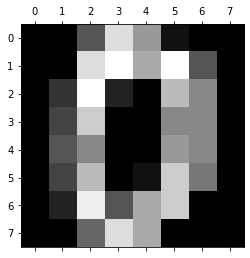

In [12]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(mnist.images[0]) 
plt.show() 

`plt.matshow()`는 숫자로 된 행렬을 시각화하는 함수다. 간단한 행렬을 만들어 연습해보자.

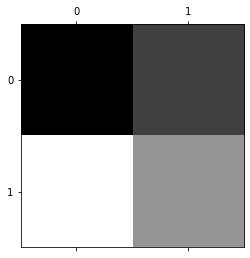

In [13]:
c = np.array([1, 4, 13, 8]).reshape(2,2)
plt.matshow(c)
plt.show()

손글씨를 판독하는 문제이므로 흑백 그림을 그리기 위해 위의 코드에서는  `plt.gray()`라고 지정했다. `gray`는 그림의 색상을 지정하는 colormap의 하나인데 아래와 같이 `plt.matshow()` 안에서 `cmap = `으로 지정해도 된다. `gray`와 `gray_r`의 결과를 비교해보라.



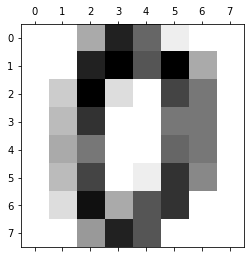

In [14]:
plt.matshow(mnist.images[0], cmap = 'gray_r')
plt.show()

만약 흑백이 대신 컬러로 그림을 그리고 싶다면 `matplotlib.pyplot`이 제공하는 여러가지 [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) 옵션 중에서 적절한 것을 선택하면 된다.

<Figure size 432x288 with 0 Axes>

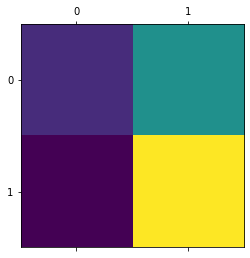

In [15]:
c = np.array([1, 4, 0, 8]).reshape(2,2)
plt.viridis()
plt.matshow(c)
plt.show()

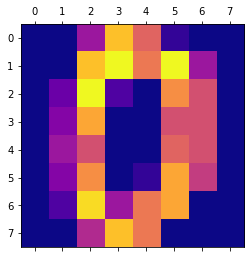

In [16]:
plt.matshow(mnist.images[0], cmap = 'plasma') 
plt.show() 

mnist 데이터세트에는 하나의 숫자를 나타내는 64개 데이터가 두 군데 들어있다. `mnist.image`에는 $8 \times 8$ 이미지 파일로, `mnist.data`에는 길이가 64인 array로 들어있다. 이미지 파일 대신 `mnist.data`로 그림을 그리고 싶다면 아래와 같이 2차원 배열로 만들어서 그리면 된다.

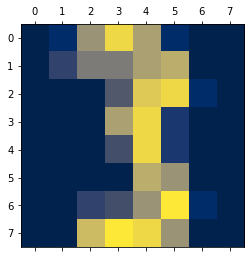

In [17]:
plt.matshow(mnist.data[59].reshape(8,8), cmap = 'cividis') 
plt.show() 

동일한 그림을 `matshow()` 대신 `imshow()`를 이용해서 그릴 수도 있다.

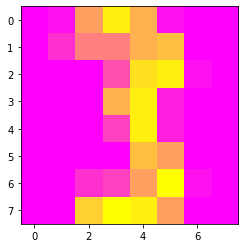

In [18]:
plt.imshow(mnist.images[59], cmap = 'spring')



또 100, 1000번째, 그리고 마지막 숫자의 이미지를 그린 아래 그림들을 보자. 각각 어떤 숫자로 보이는가?


<Figure size 432x288 with 0 Axes>

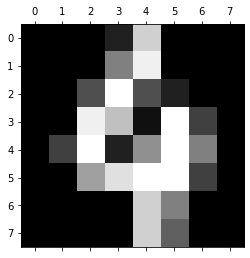

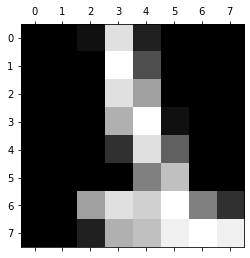

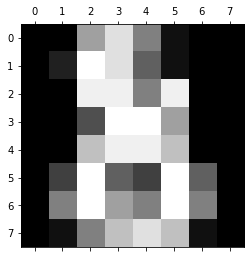

In [19]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(mnist.images[100]) 
plt.matshow(mnist.images[1000]) 
plt.matshow(mnist.images[-1])
plt.show() 


target 값들을 확인해보자.


In [20]:
print(mnist.target)
print("### mnist.target.shape:", mnist.target.shape)

[0 1 2 ... 8 9 8]
### mnist.target.shape: (1797,)




즉 맨 첫번째 숫자의 정답은 0이다.


In [21]:
mnist.target[0]

0



100번, 1000번째와 마지막 숫자도 확인해보자. 이미지를 보고 짐작한 것과 일치하는가?


In [22]:
print(mnist.target[[100, 1000, -1]])

[4 1 8]


어떤 숫자일지 알쏭달쏭한 데이터가 많다. 머신러닝 방법으로 모델을 훈련시켜서 숫자를 판독하도록 해보자. 어쩌면 우리보다 더 잘 할지도 모른다.

* 데이터 분할

In [23]:
X_train,X_test,y_train,y_test=train_test_split(mnist.data,mnist.target,test_size=0.2)

In [24]:
X_train.shape

(1437, 64)

In [25]:
y_test.shape

(360,)

* 우리는 mnist 이미지 데이터를 의사결정트리, knn, lr 모델을 이용해서 0부터 9 사이의 숫자로 분류하려 한다. 

**퀴즈 : 이 데이터에 대해 어떤 전처리 과정이 필요할까?**

   numpy의 `isnana()`을 이용하여 누락값 확인

In [26]:
np.isnan(mnist.data).sum()

0

In [27]:
np.isnan(mnist.target).sum()

0

문자열 데이터 인코딩은 필요할까? X

feature 변수 데이터의 정규화, 표준화는 필요할까? X

* 의사결정트리, knn, lr 모델 각각의 정확도를 측정. 교재 129쪽 코드에서 각 모델의 parameter들은 임의로 넣은 것이다. 교재 코드와 달리 아무런 parameter 없이 모델을 만들어서 비교해보자. SVC()에 들어있는 `probability = True` 옵션은 soft voting에 필요한 예측확률을 구하기 위한 것이다.

In [28]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

In [29]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("lr   : ",accuracy_score(y_test, lr_predicted))

[accuarcy]
d-tree:  0.8694444444444445
knn   :  0.9833333333333333
lr   :  0.9555555555555556


knn, lr의 경우 정확도가 상당히 높다. 우리의 눈보다 머신러닝이 손글씨 글자를 더 정확하게 판독하는 것 같다.

여기서 잠깐, 의사결정나무 그림을 그려보자. 

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(dtree, out_file="tree.dot", impurity=True, filled=True)

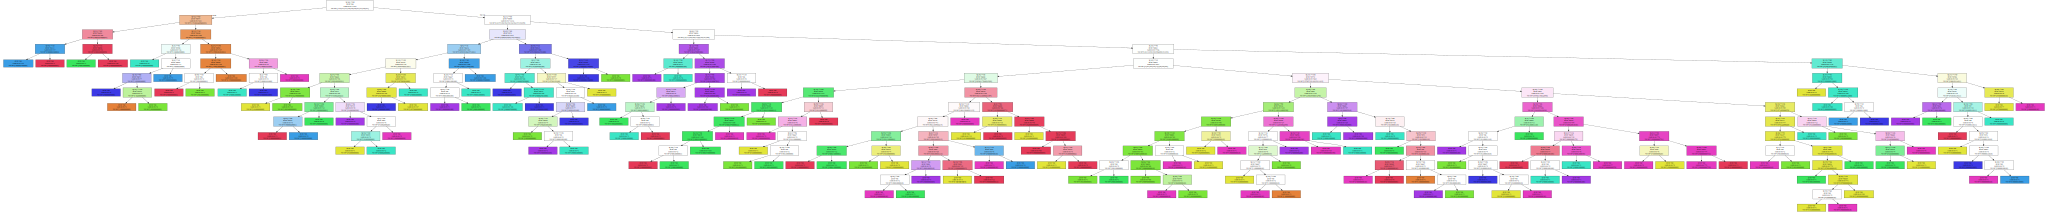

In [31]:
import graphviz
 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

나무의 깊이가 14다! 모형이 너무 복잡하다 보니 나무 전체를 화면에서 볼 수도 없다.

깊이를 줄여서 다시 만들어보자. 물론 성능은 떨어질 것이다.

In [32]:
dtree2 = tree.DecisionTreeClassifier(max_depth = 3)
dtree2.fit(X_train, y_train)
dt_pred2 = dtree2.predict(X_test)
print(accuracy_score(y_test, dt_pred2))

0.475


In [33]:
dtree3 = tree.DecisionTreeClassifier(max_depth = 5)
dtree3.fit(X_train, y_train)
dt_pred3 = dtree3.predict(X_test)
print(accuracy_score(y_test, dt_pred3))

0.6611111111111111


**퀴즈 1:**  mnist 데이터의 feature 변수는 모두 몇 개인가? 그 가운데 어떤 변수가 중요할 것 같은가? 

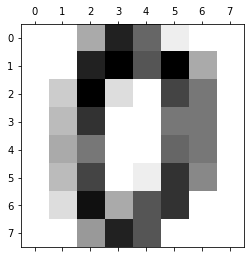

In [34]:
plt.matshow(mnist.images[0], cmap = 'gray_r')
plt.show()

**퀴즈 2** 아래 출력에는 어떤 패턴이 보이는가? 이유는 무엇인가?

In [35]:
for k in range(64):
    num = (X_train[:,k]>0).sum()
    print(k, num)

0 0
1 212
2 1084
3 1394
4 1411
5 1042
6 339
7 40
8 5
9 576
10 1304
11 1428
12 1391
13 1127
14 482
15 41
16 3
17 720
18 1252
19 1163
20 1072
21 1042
22 516
23 27
24 1
25 728
26 1183
27 1231
28 1181
29 1148
30 577
31 4
32 0
33 613
34 1080
35 1147
36 1216
37 1177
38 764
39 0
40 7
41 512
42 930
43 995
44 1091
45 1158
46 763
47 20
48 4
49 328
50 1142
51 1329
52 1338
53 1146
54 733
55 96
56 1
57 169
58 1087
59 1377
60 1349
61 1058
62 499
63 90


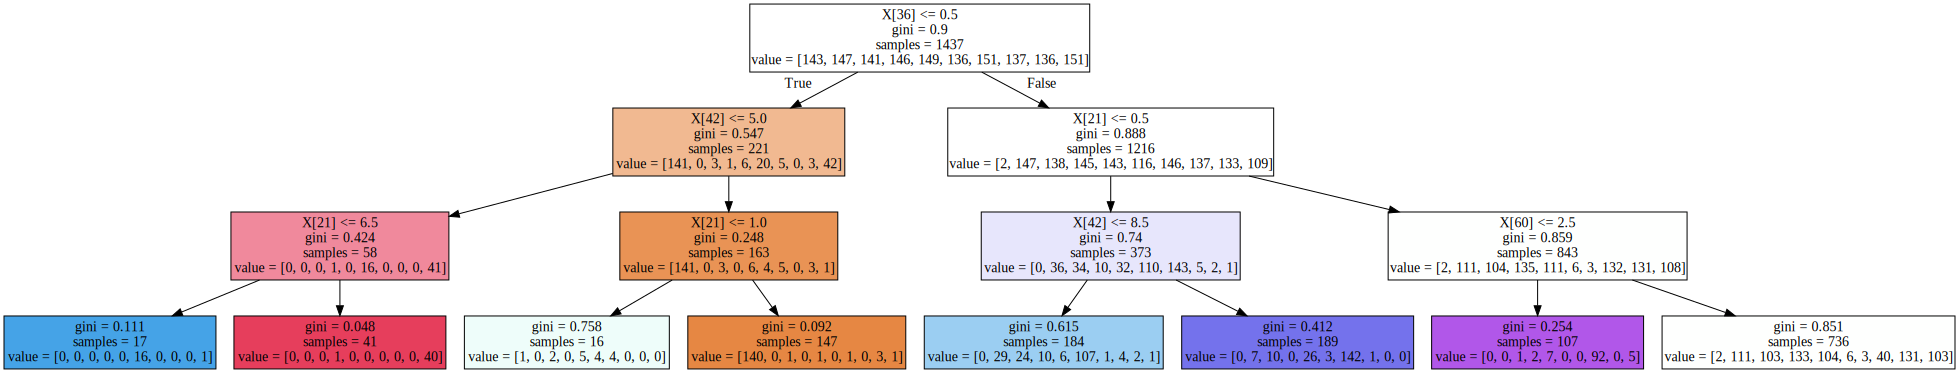

In [36]:
export_graphviz(dtree2, out_file="tree2.dot", impurity=True, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


지금까지 MNIST 데이터에 대해 살펴보았다. 이제 decition tee, knn, lr 세 모델의 voting 앙상블을 이용해서 손글씨 숫자를 맞추어 보자.

* 하드 보팅

VotingClassifier() 클래스 안에 `voting = 'hard'`라고 지정하면 된다. 그리고  VotingClassifier()에서 각 분류기는 다음과 같이 튜플로 만들어서 리스트 속에 입력한다. 

In [37]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('d_tree', dtree), ('knn', knn), ('lr', lr)], 
     voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9638888888888889

* 소프트 보팅

각 분류모델의 predict_proba에서 나오는 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식이다.

가령 서포트벡터머신으로 분류한 숫자0부터 9까지 열 가지 범주별 예측확률을 보려면(처음 2개만 보자) 다음과 같이 하면 된다. 

In [38]:
lr_proba = lr.predict_proba(X_test)
print(lr_proba[:2])

[[7.49228783e-08 2.04998307e-09 2.22540353e-09 2.03215431e-11
  1.64565927e-06 9.99997589e-01 1.44408523e-09 1.78551045e-08
  6.65975744e-07 1.19663977e-09]
 [6.19919605e-15 9.67091323e-08 9.99999903e-01 2.08489372e-12
  2.69249159e-15 3.28447799e-15 1.33835623e-12 2.05762916e-11
  2.34684163e-12 6.24043595e-13]]


위의 결과로 볼 때 lr만으로 예측한다면 첫번째 데이터는 5, 두번째 데이터는 2로 분류된다. 정답과 비교해보자.

In [39]:
y_test[:2]

array([5, 2])

soft voting 방법으로 앙상블 분류를 하려면  VotingClassifier() 클래스 안에 `voting = 'soft'`라고 지정하면 된다.

In [40]:
voting_clf = VotingClassifier(estimators=[
    ('d_tree', dtree), ('knn', knn), ('lr', lr)], 
    voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9694444444444444

* 정확도 비교 시각화

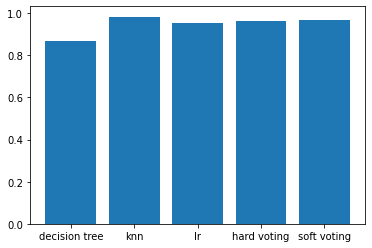

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, lr_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','lr','hard voting','soft voting']);

`일반적으로 soft voting의 성능이 더 낫다고 알려져 있지만 항상 그런 건 아니다. 앙상블이 단독 알고리즘보다 못할 경우도 있다.`

decision tree를 제외하고 나머지 방법들의 정확도가 모두 높다. 어쩌면 손글씨 판독 문제는 머신러닝 알고리즘에게 너무 쉬운 문제였던 모양이다.

## 4.4 Random Forest

### 1. 배깅과 랜덤포레스트

1) 나무들이 모이면 숲이 된다

앞서 공부한 voting 방법은 하나의 학습데이터로 여러 분류법을 모델링했었다. 그런데 같은 데이터로 훈련하는 것은 좋은 방법이 아니다. 따라서 분류기는 하나를 쓰는 대신 다른 데이터셋을 여럿 만들어 분류기를 학습시키는 방법도 가능할 텐데 배깅이 바로 그것이다. 

`Random Forest는 배깅의 한 종류`인데 배깅(Bagging)이란 Bootstrap Aggregating를 뜻한다. 여기서 부트스트래핑이 무엇인지 잠깐 살펴보자. 하나의 학습데이터로부터 중복을 허용해서 데이터를 샘플링하는 방법을 bootstraping이라고 부른다. 218쪽 그림을 보라. 1부터 10까지 값을 갖는 원본 데이터가 10개인데 여기서 크기 10인 부트스트랩 샘플을 세 개 만들었다. 배깅과 달리 중복을 허용하지 않는 샘플링은 pasting이라고 한다.

random forest 방법은 `bootstrap` 샘플링으로 만든 여러 학습 데이터셋에 각각 결정트리 방법을 적용한 다음 그 결과들을 합쳐서(`aggregate`) 분류한다(217쪽 그림을 보라).

[그림](https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/)을 보라. 그리고 그림 아래에 있는 "Bagging Features" 설명을 잘 읽어보라. 이 방법의 이름에 'random'이라는 단어가 들어있는 이유는 샘플 데이터를 bootstrap 방법으로 랜덤하게 뽑는다는 의미와 더불어 각 트리를 만들 때마다 feature 변수들 중에서 일부를 랜덤하게 고르는 과정이 들어있기 때문이다. 즉 가급적 서로 다른 여러 나무를 만들자는 것이다. 

사이킷런에서는 아래와 같이 랜덤포리스트 분류기를 부를 수 있다.

`from sklearn.ensemble import RandomForestClassifier`.

따로 지정하지 않으면 사이킷런에서는 의사결정나무 모형 100개를 결합(`n_estimators` 옵션으로 선택 가능)해서 랜덤포레스트 모형을 만든다. 또한 각 나무에서 이용할 feature 변수의 최대 갯수는 `max_features` 옵션으로 정할 수 있다. 만약 그 값을 1로 두면 전체 변수 중에서 하나를 랜덤하게 골라 가지 나누기를 시작한다는 의미이다. 그럴 경우 적절한 변수를 택해서 가지를 나누는 경우에 비해 일반적으로 나무가 더 복잡해진다.

2) 랜덤포레스트 손글씨 분류 실습

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
mnist = load_digits()

X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target,test_size=0.2)

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9806


아무런 제약이 없으면 랜덤포레스트는 최대한 복잡한 나무를 만들어 분류한다. max_depth를 3으로 줄여보자

In [43]:
rf_clf3 = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf3.fit(X_train , y_train)
pred = rf_clf3.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8361


max_depth를 1로 줄여보자

In [44]:
rf_clf1 = RandomForestClassifier(max_depth=1, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf3.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8361


3) 랜덤포레스트와 의사결정나무의 성능 비교

각 분류기에 대해 교차 검증을 10번 수행하여 평균 정확도를 저장하는 과정을 다섯 번 반복하는 함수를 만들자.

In [45]:
from sklearn.model_selection import cross_val_score

def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(5):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    return cv_scores

의사결정나무와 랜덤포레스트의 손글씨 분류 정확도를 구하자. 아래 코드들을 실행하면 **cross validation** 때문에 결과가 나올 때까지 시간이 제법 걸릴 것이다.

In [46]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), mnist.data, mnist.target)

In [47]:
rf_cv_scores = cross_validation(RandomForestClassifier(), mnist.data, mnist.target)

* 시각화 : 

랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있다.

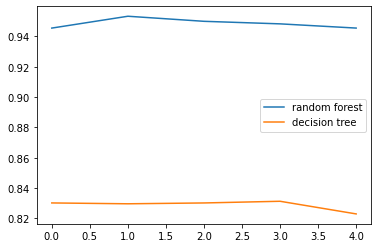

In [49]:
plt.plot(rf_cv_scores, label = "random forest")
plt.plot(dt_cv_scores, label = "decision tree")
plt.legend()
plt.show()

decision tree 단독 모델보다는 트리 모형을 여러 개 이용하는 random forest 모델이 훨씬 낫다.

이번에는 깊이가 1인 아주 간단한 나무와 깊이가 3인 나무, 그리고 깊이가 1인 나무로 만든 랜덤 포레스트의 성능을 비교해보자. 랜덤 포레스트에서 결합하는 나무의 수가 늘어남에 따라 성능이 어떻게 바뀌는지 알아보자. 아래 코드에서 정의하는 함수 **pred_score**는 10회 교차검증의 평균 정확도를 반환하는 함수다. 계산량이 많으므로 코드를 실행하면 꽤 오래 걸린다. 

In [50]:
def pred_score(model, features, target):
    return cross_val_score(model, features, target, cv=10, scoring='accuracy').mean()

stump  = tree.DecisionTreeClassifier(max_depth=1)
dtree  = tree.DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_features=1, max_depth=1)

stump_score   = pred_score(stump,  mnist.data, mnist.target)
tree_score    = pred_score(dtree,  mnist.data, mnist.target)
forest_scores = [pred_score(forest.set_params(n_estimators=n),
                                    mnist.data, mnist.target) 
                 for n in range(1,101)]

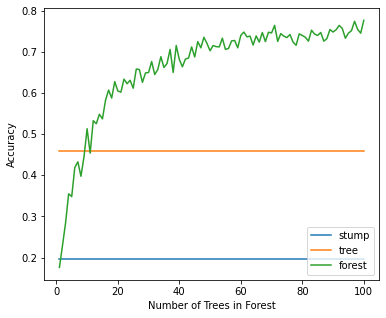

In [51]:
fig, ax = plt.subplots(figsize=(6,5))

xs = list(range(1, 101))
ax.plot(xs, np.repeat(stump_score, 100), label='stump')
ax.plot(xs, np.repeat(tree_score, 100),  label='tree')
ax.plot(xs, forest_scores, label='forest')

ax.set_xlabel('Number of Trees in Forest')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right');

결합하는 나무가 적은 처음에는 forest의 성능이 떨어지지만 얼마 지나지 않아 금방 다른 단독 나무 모형을 추월하는 것을 확인할 수 있다.

- feature 변수의 중요도 비교

특성 변수의 중요도는 그 변수를 사용한 노드가 랜덤포레스트에 잇는 모든 트리에서 평균적으로 불순도를 얼마나 감소시켰는지 나타낸다.

In [52]:
importance = rf_clf.feature_importances_
importance = importance.reshape(8,8)
importance

array([[0.00000000e+00, 2.04714186e-03, 1.86392525e-02, 8.85919178e-03,
        9.79965124e-03, 2.13446534e-02, 7.89974233e-03, 7.76742139e-04],
       [6.74837488e-05, 1.28398601e-02, 2.52513675e-02, 7.03408586e-03,
        1.44270094e-02, 3.01109895e-02, 5.59841521e-03, 4.43621312e-04],
       [1.35920916e-04, 8.05646449e-03, 2.14244626e-02, 2.27061645e-02,
        3.18185404e-02, 4.97315254e-02, 8.53361395e-03, 2.24824659e-04],
       [3.96051625e-05, 1.26793301e-02, 4.14063619e-02, 2.87936733e-02,
        3.39437062e-02, 2.43309389e-02, 2.76902342e-02, 3.86282392e-05],
       [0.00000000e+00, 2.82824443e-02, 2.86247711e-02, 1.85238966e-02,
        3.65685295e-02, 1.95487333e-02, 2.72873126e-02, 0.00000000e+00],
       [4.92187424e-05, 1.27187897e-02, 3.48122223e-02, 4.34005826e-02,
        2.08278833e-02, 1.85553298e-02, 2.03827601e-02, 1.03177501e-05],
       [4.44721245e-05, 2.38737417e-03, 1.40370144e-02, 2.15059838e-02,
        1.57687203e-02, 2.30655096e-02, 2.85501796e-02, 1.

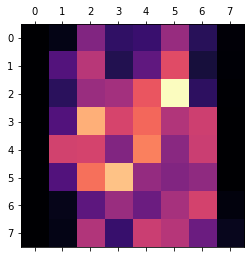

In [53]:
plt.matshow(importance, cmap = 'magma')
plt.show()

### 2. 랜덤 포레스트 hyper parameter 튜닝

1) Random forest hyper parameter

RandomForestClassifier 객체 생성 후 GridSearchCV()를 수행하여 최적 하이퍼 파라미터를 찾아보자. 각 parameter에 대한 간단한 설명은 교재 219-220쪽을 참조하자. 그런데 트리 모형에 여러 parameter가 필요하므로 아래 코드를 수행하면 시간이 상당히 오래 걸린다.

In [55]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9353


위에서 찾은 최적 하이퍼 파라미터('max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8)에 대해 트리의 수를 뜻하는 n_estimators를 100에서 300으로 늘이고 별도의 test data에서 예측 성능을 알아보자.

In [56]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9583


마지막으로 feature들의 중요도를 그림으로 알아보자.

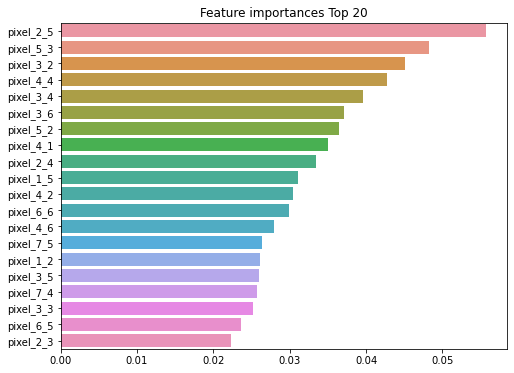

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=mnist.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

2) 참고 사항

**참고 1**

앙상블 방법이 널리 쓰이는 이유가 단지 경험, 또는 집단지성이 더 나을 것이라는 희망, 상식 때문일까? 그렇지만은 않다. 앙상블 방법은 기초통계학 과목에서 공부한 `'큰 수의 법칙'`에 바탕을 두고 있다.  아래 코드를 통해 hard voting 앙상블의 이론적 근거를 생각해보자. (설명과 code 출처 : <핸즈온 머신러닝 2판> p. 247; [역자 블로그](https://tensorflow.blog/handson-ml2/)에서 제공하는 코드).



암을 진단하는 여러 방법들이 있는데 암환자에게 그 방법들을 적용하면 모두가 51%만 암으로 양성판정(TPR = recall = 51%)하는 부정확한 방법들이라고 하자. 한 가지 방법으로는 믿을만한 결과를 얻을 수 없으므로 어떤 암환자를 여러 방법으로 검사한 결과를 합해서 다수결(hard voting)로 판정한다고 하자. 검사 방법이 모두 10가지라면 실제 암환자를 검사한 10개 결과 중에서 암판정이 6개 이상 나오면 최종적으로 암으로 판정한다. 판정 결과가 얼마나 정확할까? 아래 그림은 검사방법이 10,000개일 경우를 열 번 모의실험한 결과다.

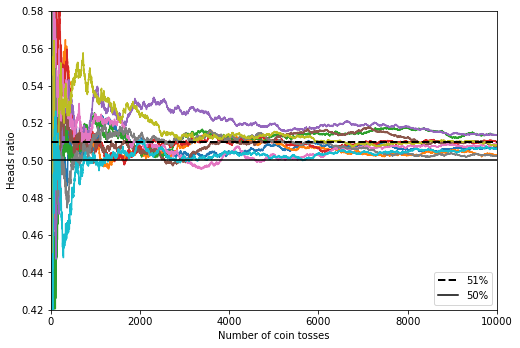

In [75]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 5.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.show()

위의 그림은 무엇을 나타낼까? 0과 1 사이의 난수 10,000개를 뽑아 0.51보다 큰지 작은지 알아본다. 난수의 값이 0.51보다 작으면 1, 크면 0값으로 코딩한다면 전체 난수의 51% 정도가 1이 되고 나머지는 0이 될 것이다. 그 값들은 한 명의 암환자를 재현율 51%인 검사법 1만 가지를 써서 검사할 때 나오는 결과라고 할 수 있다(1이면 암 판정). 

1만번 검사 가운데 암환자를 암으로 판정한 비율을 구하려면 1만개 결과의 누적합(np.cumsum)을 구해서 10,000으로 나누면 된다. 최종 판정은 1만번 검사 결과 중에서 다수인 결과로 정하기 때문에 그 비율이 50%를 넘으면 암으로 판정한다. 

위의 그림에서 x축은 검사 방법의 수를 나타내며, 10개의 선은 검사 방법의 수에 따른 암판정 비율(cumulative_heads_ratio)을 그린 것이다. 다수결로 최종 암판정을 하므로 그 선의 값이 50%를 넘으면 제대로 판정한 것이다.

 검사 방법이 1,000가지, 10,000가지일 때 올바른 암 판정 결과가 나올 확률을 이항분포의 누적확률을 이용해서 구해보자. X가 이항분포 B(n, p)를 따를 때 
 $$ {\rm P(X > k )}$$의 값은 `1-  binom.cdf(k, n, p)`로 구할 수 있다. 누적확률을 구하는 함수는 `scipy` 패키지의 `stats` 모듈 안에 있다.



In [110]:
from scipy.stats import binom
1 - binom.cdf(500, 1000, 0.51)

0.7260985557303354

In [111]:
from scipy.stats import binom
1 - binom.cdf(5000, 10000, 0.51)

0.9767182874807615



즉 암환자를 겨우 51%밖에 찾아내지 못하는 방법도 그 수가 아주 많으면 hard voting으로 판정한 결과가 대단히 정확해진다. 그림에서 보듯 10,000번씩 검사하는 실험을 10회 반복한 결과 마지막에는 열번 모두 50%를 넘었다. 

**참고 2**

random forest는 bagging의 한 종류다. 일반적으로 배깅 분류를 위해 사이킷런에서는 BaggingClassifier를 제공하고 있다. BaggingClassifier는 결정트리 이외의 방법에 배깅을 적용할 때 이용할 수 있다. 아래 코드로 잠깐 연습해보자.


In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

3) 여러 가지 배깅 연습

* 결정트리 분류 배깅

In [113]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9416666666666667


* 로지스틱회귀 분류 배깅

In [114]:
bag_clf2 = BaggingClassifier(LogisticRegression(), n_estimators=10)
bag_clf2.fit(X_train, y_train)
y_pred2 = bag_clf2.predict(X_test)

print(accuracy_score(y_test, y_pred2))

0.9694444444444444


* kNN 분류 배깅

In [115]:
bag_clf3 = BaggingClassifier(KNeighborsClassifier(), n_estimators=10)
bag_clf3.fit(X_train, y_train)
y_pred3 = bag_clf3.predict(X_test)

print(accuracy_score(y_test, y_pred3))

0.9916666666666667


* Naive Bayes 분류 배깅

---



In [116]:
bag_clf4 = BaggingClassifier(MultinomialNB(), n_estimators=10)
bag_clf4.fit(X_train, y_train)
y_pred4 = bag_clf4.predict(X_test)

print(accuracy_score(y_test, y_pred4))

0.9138888888888889


### 3. 앙상블 모형을 이용한 유방암 데이터 분류 연습

1) 의사결정나무 복습

In [117]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [118]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data, cancer.target,
                                                       test_size = 0.2,  random_state = 11)

In [119]:
dt_clf = DecisionTreeClassifier(max_depth=3) 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

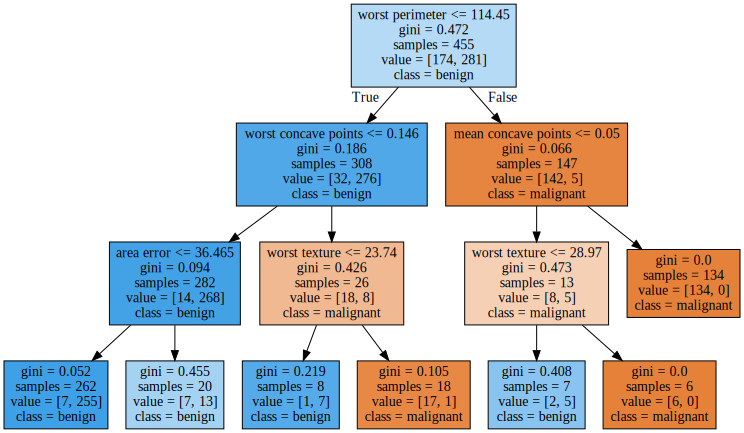

In [120]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=cancer.target_names , \
feature_names = cancer.feature_names, impurity=True, filled=True)

import graphviz
 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [121]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.9649122807017544

2) 랜덤포레스트

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

0.9912280701754386


좋아졌는가? 

### feature 변수들의 중요도 26분

3) kNN 배깅

In [123]:
bag_clf2 = BaggingClassifier(KNeighborsClassifier(), n_estimators=50)
bag_clf2.fit(X_train, y_train)
y_pred2 = bag_clf2.predict(X_test)

print(accuracy_score(y_test, y_pred2))

0.956140350877193


4) voting

In [124]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

In [125]:
voting_clf1 = VotingClassifier(estimators=[
    ('d_tree', dtree), ('knn', knn), ('lr', lr)], 
     voting='hard').fit(X_train, y_train)
     
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9473684210526315

In [126]:
voting_clf2 = VotingClassifier(estimators=[
    ('d_tree', dtree), ('knn', knn), ('lr', lr)], 
     voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.956140350877193